In [ ]:
# ==========================================
# 1. IMPORTAR LLIBRERIES I CARREGAR DADES
# ==========================================
import pandas as pd
import numpy as np
import re
from google.colab import drive

# Muntar Drive
drive.mount('/content/drive')

# Ruta del fitxer
file_path = '/content/drive/MyDrive/TFG/Fase5/Dades_experiment_TFG.csv'

try:
    # Carreguem el CSV
    df = pd.read_csv(file_path)
    print("✅ ARXIU CARREGAT AMB ÈXIT")
    print(f"Mostra total: {len(df)} participants")

    # ==========================================
    # 2. CÀLCUL DEL DELTA (IMPRESCINDIBLE)
    # ==========================================
    print("🧮 Calculant el Delta (Canvi d'Opinió)...")

    def calcular_delta_real(row):
        try:
            grup = str(row['grup_experimental'])
            if '1' in grup: # Educació
                return row['s4_post_item1'] - row['s2_likert_educacio1']
            elif '2' in grup: # Immigració
                return row['s4_post_item2'] - row['s2_likert_immi2']
            return 0
        except: return 0

    df['Delta_Calculat'] = df.apply(calcular_delta_real, axis=1)

    # ==========================================
    # 3. DICCIONARIS DE PARAULES (PER TEMA I PER VISUAL)
    # ==========================================

    # --- PARAULES PER A 'RECORD VISUAL' (Què has vist?) ---
    visual_alarm = ['caiguda', 'baixada', 'fletxa', 'vermell', 'pic', 'descens', 'brusc', 'abisme', 'buit', 'negatiu']
    visual_neutral = ['línia', 'línies', 'blau', 'recta', 'constant', 'igual', 'dades', 'gràfic', 'barres', 'números']
    visual_critical = ['eix', 'tallat', 'trucat', 'escala', 'zoom', 'manipulat', 'enganyós', 'distorsió']

    # --- PARAULES PER A 'RECORD TEMA' (De què va això?) ---
    theme_alarm = ['crisi', 'problema', 'greu', 'preocupant', 'desastre', 'retallada', 'invasió', 'perill', 'dolent', 'urgent']
    theme_neutral = ['inversió', 'despesa', 'evolucions', 'pressupost', 'alumnes', 'estrangers', 'població', 'percentatge']

    stopwords_cat = ['el', 'la', 'els', 'les', 'de', 'del', 'i', 'a', 'que', 'es', 'en', 'un', 'una', 'per', 'amb', 'son', 'hi', 'ha', 'ho', 'més', 'no', 'si', 'tot', 'com', 'pel', 'o', 'al']

    # ==========================================
    # 4. MOTOR D'ANÀLISI (PROCESSA LES DUES COLUMNES)
    # ==========================================

    def analitzar_visual(text):
        if pd.isna(text): return "Indeterminat", ""
        t = str(text).lower()

        # Categorització Visual
        if any(w in t for w in visual_critical): cat = "Crític (Detecta truc)"
        elif any(w in t for w in visual_alarm): cat = "Alarmista (Veu caiguda)"
        elif any(w in t for w in visual_neutral): cat = "Neutre (Veu línies)"
        else: cat = "Indeterminat"

        # Neteja
        clean = " ".join([w for w in re.sub(r'[^\w\s]', '', t).split() if w not in stopwords_cat and len(w)>2])
        return cat, clean

    def analitzar_tema(text):
        if pd.isna(text): return "Indeterminat", ""
        t = str(text).lower()

        # Categorització Temàtica
        if any(w in t for w in theme_alarm): cat = "Emocional/Negatiu"
        elif any(w in t for w in theme_neutral): cat = "Descriptiu/Neutre"
        else: cat = "Indeterminat"

        clean = " ".join([w for w in re.sub(r'[^\w\s]', '', t).split() if w not in stopwords_cat and len(w)>2])
        return cat, clean

    print("🔄 Processant s5_record_visual...")
    df[['Cat_Visual', 'Clean_Visual']] = df['s5_record_visual'].apply(lambda x: pd.Series(analitzar_visual(x)))

    print("🔄 Processant s5_record_tema...")
    df[['Cat_Tema', 'Clean_Tema']] = df['s5_record_tema'].apply(lambda x: pd.Series(analitzar_tema(x)))

    # Score Total d'Alarma (Suma de paraules alarmistes en les dues columnes)
    def calcular_score_total(row):
        txt = (str(row['s5_record_visual']) + " " + str(row['s5_record_tema'])).lower()
        return sum(1 for w in (visual_alarm + theme_alarm) if w in txt)

    df['Score_Alarma_Total'] = df.apply(calcular_score_total, axis=1)

    # ==========================================
    # 5. EXPORTAR
    # ==========================================
    cols_export = [
        'id_participant', 'grup_experimental', 'Delta_Calculat',
        's5_record_visual', 'Cat_Visual', 'Clean_Visual',
        's5_record_tema', 'Cat_Tema', 'Clean_Tema',
        'Score_Alarma_Total'
    ]

    output_path = '/content/drive/MyDrive/TFG/Fase5/dades_qualitatives_tableau_FULL.xlsx'
    df[cols_export].to_excel(output_path, index=False)

    print("\n✅ ANÀLISI COMPLETAT!")
    print(f"📁 Arxiu generat: {output_path}")

    print("\n--- RESUM: VISUAL (Què recorden?) ---")
    print(df.groupby(['grup_experimental', 'Cat_Visual']).size())

    print("\n--- RESUM: TEMA (Com ho descriuen?) ---")
    print(df.groupby(['grup_experimental', 'Cat_Tema']).size())

except Exception as e:
    print(f"❌ ERROR: {e}")

Mounted at /content/drive
✅ ARXIU CARREGAT AMB ÈXIT
Mostra total: 139 participants
🧮 Calculant el Delta (Canvi d'Opinió)...
🔄 Processant s5_record_visual...
🔄 Processant s5_record_tema...

✅ ANÀLISI COMPLETAT!
📁 Arxiu generat: /content/drive/MyDrive/TFG/Fase5/dades_qualitatives_tableau_FULL.xlsx

--- RESUM: VISUAL (Què recorden?) ---
grup_experimental  Cat_Visual             
A1                 Alarmista (Veu caiguda)     5
                   Crític (Detecta truc)       1
                   Indeterminat               18
                   Neutre (Veu línies)         8
A2                 Indeterminat               29
                   Neutre (Veu línies)         2
B1                 Alarmista (Veu caiguda)    12
                   Crític (Detecta truc)       2
                   Indeterminat               17
                   Neutre (Veu línies)         6
B2                 Alarmista (Veu caiguda)     9
                   Crític (Detecta truc)       1
                   Indeterminat  


🚀 INICIANT CÀLCULS ESTADÍSTICS AUTOMÀTICS...

--- ANÀLISI: Record Visual: Educació (A1 vs B1) ---
📊 Taula Fisher (Target vs Resta): [[np.int64(5), np.int64(9)], [np.int64(12), np.int64(8)]]
📉 p-value: 0.29600


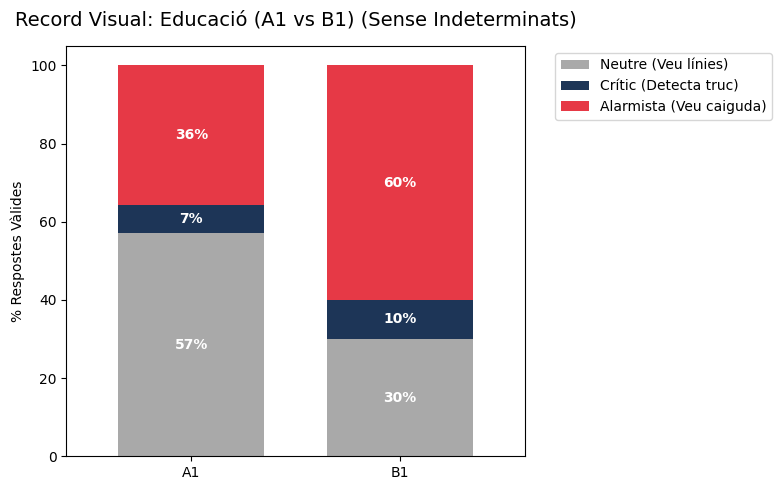


--- ANÀLISI: Record Visual: Immigració (A2 vs B2) ---
📊 Taula Fisher (Target vs Resta): [[np.int64(0), np.int64(2)], [np.int64(9), np.int64(2)]]
📉 p-value: 0.07692


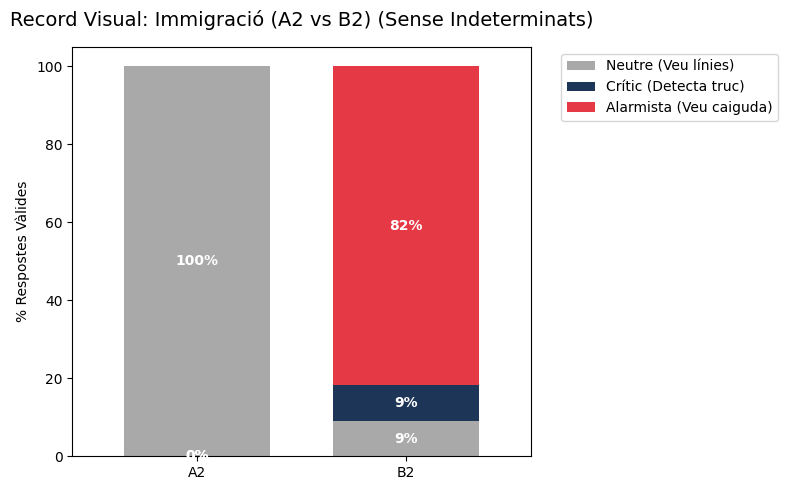


--- ANÀLISI: Marc Temàtic: Educació (A1 vs B1) ---
📊 Taula Fisher (Target vs Resta): [[np.int64(1), np.int64(10)], [np.int64(3), np.int64(13)]]
📉 p-value: 0.62393


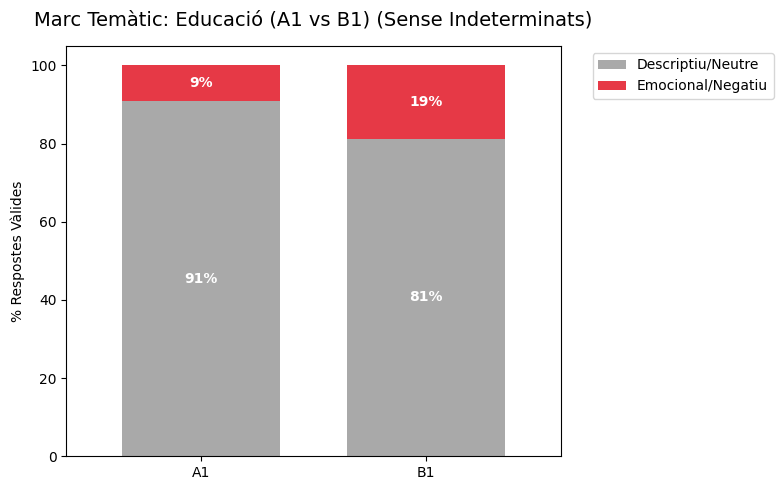


--- ANÀLISI: Marc Temàtic: Immigració (A2 vs B2) ---
📊 Taula Fisher (Target vs Resta): [[np.int64(1), np.int64(10)], [np.int64(0), np.int64(9)]]
📉 p-value: 1.00000


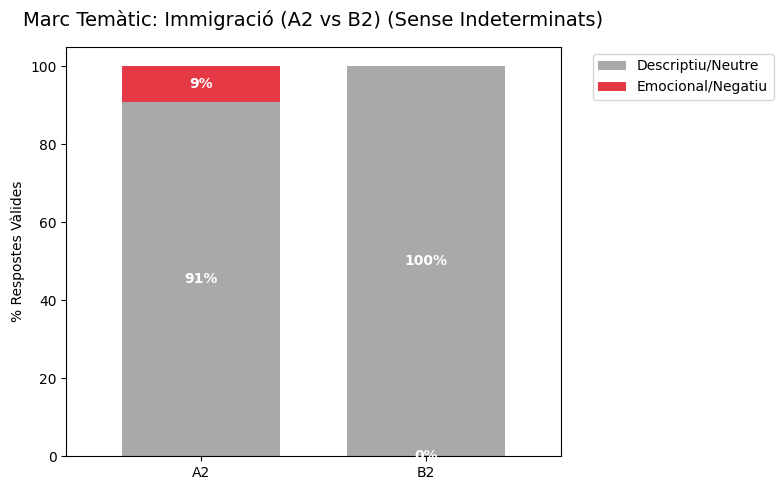

In [ ]:
# ==========================================
# 6. ANÀLISI ESTADÍSTIC I GRÀFICS (AUTOMÀTIC)
# ==========================================
import scipy.stats as stats
import matplotlib.pyplot as plt

print("\n🚀 INICIANT CÀLCULS ESTADÍSTICS AUTOMÀTICS...")

# Funció genèrica per fer el Test de Fisher i preparar dades per al plot
def analitzar_i_graficar(df, titol, col_categoria, grups_control, grups_persuasiu, cat_target, cats_ref):
    print(f"\n--- ANÀLISI: {titol} ---")

    # 1. Filtrar dades vàlides (Target + Referència) i els grups pertinents
    cats_valid = [cat_target] + cats_ref
    df_valid = df[
        (df[col_categoria].isin(cats_valid)) &
        (df['grup_experimental'].isin(grups_control + grups_persuasiu))
    ].copy()

    # 2. Simplificar categories per al càlcul (Target vs Resta)
    df_valid['Tipus'] = df_valid[col_categoria].apply(lambda x: 'Target' if x == cat_target else 'Ref')
    df_valid['Tipus_Grup'] = df_valid['grup_experimental'].apply(lambda x: 'Control' if x in grups_control else 'Persuasiu')

    # 3. Taula de contingència per a Fisher
    crosstab = pd.crosstab(df_valid['Tipus_Grup'], df_valid['Tipus'])
    # Assegurar l'ordre [Control, Persuasiu] x [Target, Ref]
    try:
        count_control_target = crosstab.loc['Control', 'Target'] if 'Target' in crosstab.columns else 0
        count_control_ref = crosstab.loc['Control', 'Ref'] if 'Ref' in crosstab.columns else 0
        count_exp_target = crosstab.loc['Persuasiu', 'Target'] if 'Target' in crosstab.columns else 0
        count_exp_ref = crosstab.loc['Persuasiu', 'Ref'] if 'Ref' in crosstab.columns else 0

        table = [[count_control_target, count_control_ref], [count_exp_target, count_exp_ref]]
        res = stats.fisher_exact(table, alternative='two-sided')
        print(f"📊 Taula Fisher (Target vs Resta): {table}")
        print(f"📉 p-value: {res.pvalue:.5f}")
    except Exception as e:
        print(f"⚠️ No s'ha pogut calcular Fisher (falten dades): {e}")

    # 4. Generar Gràfic Stacked (100%)
    # Agrupem per grup específic (A1, B1...) i categoria original
    counts = df_valid.groupby(['grup_experimental', col_categoria]).size().unstack(fill_value=0)

    # Normalitzar a %
    counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

    # Ordenar columnes per estètica (Target primer o últim segons preferència)
    # Intentem posar primer les de referència (Neutre) i després Target (Alarmista)
    cols_order = [c for c in cats_ref if c in counts_pct.columns] + [cat_target]
    counts_pct = counts_pct[cols_order]

    # Colors (Adaptats a les teves categories)
    colors_map = {
        'Neutre (Veu línies)': '#A9A9A9',      # Gris
        'Descriptiu/Neutre': '#A9A9A9',        # Gris
        'Crític (Detecta truc)': '#1D3557',    # Blau fosc
        'Alarmista (Veu caiguda)': '#E63946',  # Vermell
        'Emocional/Negatiu': '#E63946'         # Vermell
    }
    my_colors = [colors_map.get(c, '#333333') for c in cols_order]

    ax = counts_pct.plot(kind='bar', stacked=True, color=my_colors, figsize=(8, 5), width=0.7)

    plt.title(f"{titol} (Sense Indeterminats)", fontsize=14, pad=15)
    plt.ylabel("% Respostes Vàlides")
    plt.xlabel("")
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Etiquetes de dades
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', weight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

# --- EXECUTAR PER A VISUAL (EDUCACIÓ) ---
analitzar_i_graficar(
    df=df,
    titol="Record Visual: Educació (A1 vs B1)",
    col_categoria='Cat_Visual',
    grups_control=['A1'],
    grups_persuasiu=['B1'],
    cat_target='Alarmista (Veu caiguda)',
    cats_ref=['Neutre (Veu línies)', 'Crític (Detecta truc)']
)

# --- EXECUTAR PER A VISUAL (IMMIGRACIÓ) ---
analitzar_i_graficar(
    df=df,
    titol="Record Visual: Immigració (A2 vs B2)",
    col_categoria='Cat_Visual',
    grups_control=['A2'],
    grups_persuasiu=['B2'],
    cat_target='Alarmista (Veu caiguda)',
    cats_ref=['Neutre (Veu línies)', 'Crític (Detecta truc)']
)

# --- EXECUTAR PER A TEMA (EDUCACIÓ) ---
analitzar_i_graficar(
    df=df,
    titol="Marc Temàtic: Educació (A1 vs B1)",
    col_categoria='Cat_Tema',
    grups_control=['A1'],
    grups_persuasiu=['B1'],
    cat_target='Emocional/Negatiu',
    cats_ref=['Descriptiu/Neutre']
)

# --- EXECUTAR PER A TEMA (IMMIGRACIÓ) ---
analitzar_i_graficar(
    df=df,
    titol="Marc Temàtic: Immigració (A2 vs B2)",
    col_categoria='Cat_Tema',
    grups_control=['A2'],
    grups_persuasiu=['B2'],
    cat_target='Emocional/Negatiu',
    cats_ref=['Descriptiu/Neutre']
)

In [ ]:
import scipy.stats as stats
import pandas as pd

print("\n📊 CÀLCUL ESTADÍSTIC: PETJADA VISUAL (5.2.2)")

# Funció per calcular el p-value (Fisher) ignorant els Indeterminats
def calcular_p_visual(titol, grup_control, grup_persuasiu, df):
    # 1. Filtrar: Només grups implicats i Treure Indeterminats
    # Considerem "Vàlid" tot el que NO és Indeterminat
    # Target = Alarmista (Veu caiguda)
    # Reference = Neutre (Veu línies) + Crític (Detecta truc)

    cats_valid = ['Alarmista (Veu caiguda)', 'Neutre (Veu línies)', 'Crític (Detecta truc)']

    df_valid = df[
        (df['Cat_Visual'].isin(cats_valid)) &
        (df['grup_experimental'].isin(grup_control + grup_persuasiu))
    ].copy()

    # 2. Crear variables binàries per a la taula 2x2
    # És Alarmista? (Si/No)
    df_valid['Is_Alarmist'] = df_valid['Cat_Visual'] == 'Alarmista (Veu caiguda)'
    # És Grup Persuasiu? (Si/No)
    df_valid['Is_Persuasiu'] = df_valid['grup_experimental'].isin(grup_persuasiu)

    # 3. Taula de contingència
    crosstab = pd.crosstab(df_valid['Is_Persuasiu'], df_valid['Is_Alarmist'])

    # Extraure valors segurs (per si algun és 0)
    # Format Fisher: [[Control_NoAlarm, Control_Alarm], [Persuasiu_NoAlarm, Persuasiu_Alarm]]
    try:
        # Grup Control (No Persuasiu)
        c_no = crosstab.loc[False, False] if False in crosstab.index and False in crosstab.columns else 0
        c_yes = crosstab.loc[False, True] if False in crosstab.index and True in crosstab.columns else 0

        # Grup Persuasiu (Si Persuasiu)
        p_no = crosstab.loc[True, False] if True in crosstab.index and False in crosstab.columns else 0
        p_yes = crosstab.loc[True, True] if True in crosstab.index and True in crosstab.columns else 0

        table = [[c_yes, c_no], [p_yes, p_no]] # Alarmista vs Resta

        res = stats.fisher_exact(table, alternative='two-sided')

        print(f"\n--- {titol} ---")
        print(f"Taula [Alarmista, Altres]: Control{table[0]} vs Persuasiu{table[1]}")
        print(f"✅ P-VALUE: {res.pvalue:.5f}")

    except Exception as e:
        print(f"Error: {e}")

# Executar els dos càlculs
calcular_p_visual("EDUCACIÓ (A1 vs B1)", ['A1'], ['B1'], df)
calcular_p_visual("IMMIGRACIÓ (A2 vs B2)", ['A2'], ['B2'], df)


📊 CÀLCUL ESTADÍSTIC: PETJADA VISUAL (5.2.2)

--- EDUCACIÓ (A1 vs B1) ---
Taula [Alarmista, Altres]: Control[np.int64(5), np.int64(9)] vs Persuasiu[np.int64(12), np.int64(8)]
✅ P-VALUE: 0.29600

--- IMMIGRACIÓ (A2 vs B2) ---
Taula [Alarmista, Altres]: Control[np.int64(0), np.int64(2)] vs Persuasiu[np.int64(9), np.int64(2)]
✅ P-VALUE: 0.07692


In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np

print("\n📚 CÀLCUL ESTADÍSTIC: CONTAGI TEMÀTIC (5.2.3)")

# Funció per calcular el p-value (Fisher) per TEMA
def calcular_p_tema(titol, grup_control, grup_persuasiu, df):
    # Target = Emocional/Negatiu
    # Reference = Descriptiu/Neutre
    # (Ignorem Indeterminats)

    cats_valid = ['Emocional/Negatiu', 'Descriptiu/Neutre']

    df_valid = df[
        (df['Cat_Tema'].isin(cats_valid)) &
        (df['grup_experimental'].isin(grup_control + grup_persuasiu))
    ].copy()

    # Binària: És Emocional?
    df_valid['Is_Emotional'] = df_valid['Cat_Tema'] == 'Emocional/Negatiu'
    df_valid['Is_Persuasiu'] = df_valid['grup_experimental'].isin(grup_persuasiu)

    crosstab = pd.crosstab(df_valid['Is_Persuasiu'], df_valid['Is_Emotional'])

    try:
        # Control
        c_no = crosstab.loc[False, False] if False in crosstab.index and False in crosstab.columns else 0
        c_yes = crosstab.loc[False, True] if False in crosstab.index and True in crosstab.columns else 0
        # Persuasiu
        p_no = crosstab.loc[True, False] if True in crosstab.index and False in crosstab.columns else 0
        p_yes = crosstab.loc[True, True] if True in crosstab.index and True in crosstab.columns else 0

        table = [[c_yes, c_no], [p_yes, p_no]]
        res = stats.fisher_exact(table, alternative='two-sided')

        print(f"\n--- {titol} ---")
        print(f"Taula [Emocional, Descriptiu]: Control{table[0]} vs Persuasiu{table[1]}")
        print(f"✅ P-VALUE: {res.pvalue:.5f}")

    except Exception as e:
        print(f"Error: {e}")

# Executar
calcular_p_tema("TEMA EDUCACIÓ (A1 vs B1)", ['A1'], ['B1'], df)
calcular_p_tema("TEMA IMMIGRACIÓ (A2 vs B2)", ['A2'], ['B2'], df)


📚 CÀLCUL ESTADÍSTIC: CONTAGI TEMÀTIC (5.2.3)

--- TEMA EDUCACIÓ (A1 vs B1) ---
Taula [Emocional, Descriptiu]: Control[np.int64(1), np.int64(10)] vs Persuasiu[np.int64(3), np.int64(13)]
✅ P-VALUE: 0.62393

--- TEMA IMMIGRACIÓ (A2 vs B2) ---
Taula [Emocional, Descriptiu]: Control[np.int64(1), np.int64(10)] vs Persuasiu[np.int64(0), np.int64(9)]
✅ P-VALUE: 1.00000
